## m = 2 Fit

In [177]:
from numpy import loadtxt, arange, reshape, polynomial

data_file_name = 'l2_m2.txt'

data = loadtxt(data_file_name, skiprows = 2)

x = []
y = []
for nr in range(len(data)):
    x.append(data[nr,0])
    y.append(data[nr,1])
    
x.append(1)
y.append(42.3942406143283)

In [178]:
import numpy

deg = 5
coef = polynomial.polynomial.polyfit(x, y, deg, rcond=None, full=False, w=None)
#coef = polynomial.polynomial.polyfit(x, y, deg, rcond=None, full=False, w=1/(numpy.abs(y)))
print(coef)

[   527.58135297  -3255.4253482   10140.35058758 -16433.4855839
  13193.16204283  -4131.65547055]


In [179]:
import numpy

def polyfit_with_fixed_points(n, x, y, xf, yf) :
    mat = numpy.empty((n + 1 + len(xf),) * 2)
    vec = numpy.empty((n + 1 + len(xf),))
    x_n = x**numpy.arange(2 * n + 1)[:, None]
    yx_n = numpy.sum(x_n[:n + 1] * y, axis=1)
    x_n = numpy.sum(x_n, axis=1)
    idx = numpy.arange(n + 1) + numpy.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = numpy.take(x_n, idx)
    xf_n = xf**numpy.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = numpy.linalg.solve(mat, vec)
    return params[:n + 1]

deg = 5
xf = [0]
yf = [169*numpy.pi]
coef_f = polyfit_with_fixed_points(deg, x, y, xf, yf)
print(coef_f)

[   530.92915846  -3310.12399019  10419.75147971 -17041.85837665
  13784.95887154  -4343.3475411 ]


In [180]:
def fit_func(coef,x):
    
    y = x*0
    for i in range(len(x)):
        for n in range(len(coef)):
            y[i] += coef[n]*x[i]**n
    return (y)

In [181]:
import numpy

nPts=50
xfit = numpy.array([i/nPts for i in range(nPts)])
xfit=numpy.append(xfit,[1])
yfit = fit_func(coef,xfit)

yfit_f = fit_func(coef_f,xfit)

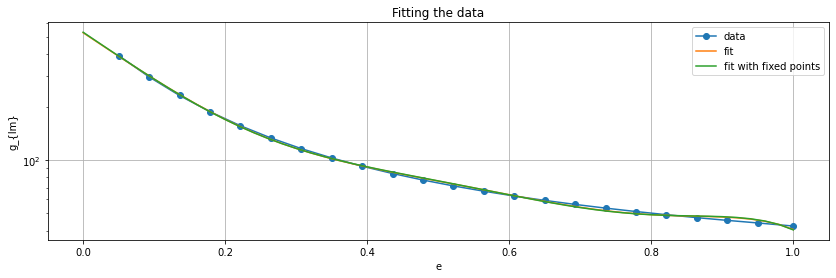

In [182]:
import pylab
%matplotlib inline
# Plot the new SNR timeseries
pylab.figure(figsize=[14, 4])
pylab.yscale("log")
pylab.plot(x, y, label='data',marker="o")
pylab.plot(xfit, yfit, label='fit')
pylab.plot(xfit, yfit_f, label='fit with fixed points')
pylab.title('Fitting the data')
pylab.legend()
pylab.grid()
pylab.xlabel('e')
pylab.ylabel('g_{lm}')
pylab.show()          

## m = 0 Fit

In [183]:
from numpy import loadtxt, arange, reshape, polynomial

data_file_name = 'l2_m0.txt'

data = loadtxt(data_file_name, skiprows = 2)
#print(data.reshape(len(data), 2))
x = []
y = []
for nr in range(len(data)):
    x.append(data[nr,0])
    y.append(data[nr,1])
    
x.append(1)
y.append(5.54539990324407)

In [184]:
import numpy

deg = 5
coef = polynomial.polynomial.polyfit(x, y, deg, rcond=None, full=False, w=None)
#coef = polynomial.polynomial.polyfit(x, y, deg, rcond=None, full=False, w=1/(numpy.abs(y)))
print(coef)

[  25.74052328 -144.6311607   477.97334361 -806.31149772  664.34944741
 -211.67902601]


In [185]:
import numpy

def polyfit_with_fixed_points(n, x, y, xf, yf) :
    mat = numpy.empty((n + 1 + len(xf),) * 2)
    vec = numpy.empty((n + 1 + len(xf),))
    x_n = x**numpy.arange(2 * n + 1)[:, None]
    yx_n = numpy.sum(x_n[:n + 1] * y, axis=1)
    x_n = numpy.sum(x_n, axis=1)
    idx = numpy.arange(n + 1) + numpy.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = numpy.take(x_n, idx)
    xf_n = xf**numpy.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = numpy.linalg.solve(mat, vec)
    return params[:n + 1]

deg = 5
xf = [0]
yf = [9*numpy.pi]
coef_f = polyfit_with_fixed_points(deg, x, y, xf, yf)
print(coef_f)

[   28.27433388  -186.03022046   689.43991437 -1266.76281328
  1112.25512594  -371.89968952]


In [186]:
def fit_func(coef,x):
    
    y = x*0
    for i in range(len(x)):
        for n in range(len(coef)):
            y[i] += coef[n]*x[i]**n
    return (y)

In [187]:
import numpy

nPts=50
xfit = numpy.array([i/nPts for i in range(nPts)])
xfit=numpy.append(xfit,[1])
yfit = fit_func(coef,xfit)

yfit_f = fit_func(coef_f,xfit)

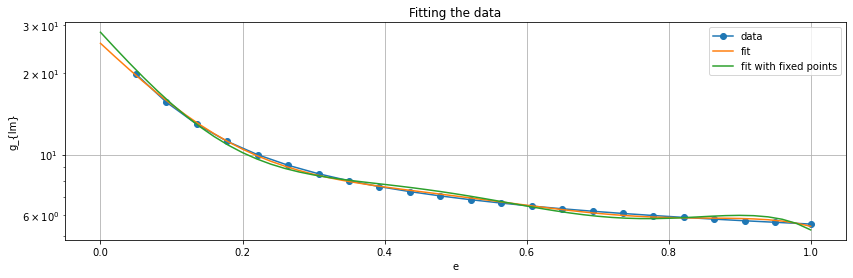

In [188]:
import pylab
%matplotlib inline
# Plot the new SNR timeseries
pylab.figure(figsize=[14, 4])
pylab.yscale("log")
pylab.plot(x, y, label='data',marker="o")
pylab.plot(xfit, yfit, label='fit')
pylab.plot(xfit, yfit_f, label='fit with fixed points')
pylab.title('Fitting the data')
pylab.legend()
pylab.grid()
pylab.xlabel('e')
pylab.ylabel('g_{lm}')
pylab.show()        